In [332]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [333]:
image = np.array(Image.open("test.jpg"))             # Load the image
angle = int(input("Enter the angle : "))                # Ask the user to enter the angle of rotation

Enter the angle : 45


In [334]:
# Define the most occuring variables
angle = math.radians(angle)                               #converting degrees to radians
cosine = math.cos(angle)
sine = math.sin(angle)
tan =  math.tan(angle)
height = image.shape[0]                                   #define the height of the image
width = image.shape[1]                                    #define the width of the image
print(cosine, sine, angle)

0.7071067811865476 0.7071067811865476 0.7853981633974483


# Rotation


In [335]:
# Define the height and width of the new image that is to be formed
# x' = xcos(teta)-ysin(teta)
# y' = xsin(teta)+ycos(teta)
new_height  = round(abs(image.shape[0]*cosine)+abs(image.shape[1]*sine))+1
new_width  = round(abs(image.shape[1]*cosine)+abs(image.shape[0]*sine))+1
print(new_height,new_width)

1769 1769


In [336]:
# define another image variable of dimensions of new_height and new _column filled with zeros
output = np.zeros((new_height,new_width,image.shape[2]))

In [337]:
image.shape

(900, 1600, 3)

In [338]:
# Find the centre of the image about which we have to rotate the image
original_centre_height   = round(((image.shape[0]+1)/2)-1)    #with respect to the original image
original_centre_width    = round(((image.shape[1]+1)/2)-1)    #with respect to the original image
print(original_centre_height , original_centre_width)

450 800


In [339]:
# Find the centre of the new image that will be obtained
new_centre_height= round(((new_height+1)/2)-1)        #with respect to the new image
new_centre_width= round(((new_width+1)/2)-1)          #with respect to the new image
print(new_centre_height , new_centre_width)

884 884


In [340]:
rotation_matrix =  np.array([[cosine, -sine],
                            [sine, cosine]])
rotation_matrix

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [341]:
inverse_rotation_matrix = rotation_matrix.T
inverse_rotation_matrix

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [342]:
# # count = 0
# print(original_centre_height,original_centre_width)
# print(new_height, new_width)

for i in range(new_height):
    for j in range(new_width):
        #new grid
        y = i - new_centre_height +1                   
        x = j - new_centre_width +1
        
        original_x = (int(inverse_rotation_matrix[0,0] * x + inverse_rotation_matrix[0,1] * y))
        original_y = (int(inverse_rotation_matrix[1,0] * x + inverse_rotation_matrix[1,1] * y))

        
        new_y = original_centre_height+original_y
        new_x = original_centre_width+original_x

        if new_x < image.shape[1] and new_y < image.shape[0] and new_x>=0 and new_y>=0:
            output[i, j, :] = image[new_y, new_x, :]
#         else:
#             count +=1
# #     print(i, count)



In [343]:
pil_img=Image.fromarray((output).astype(np.uint8))                       # converting array to image
pil_img.save("rotated_image.png")    

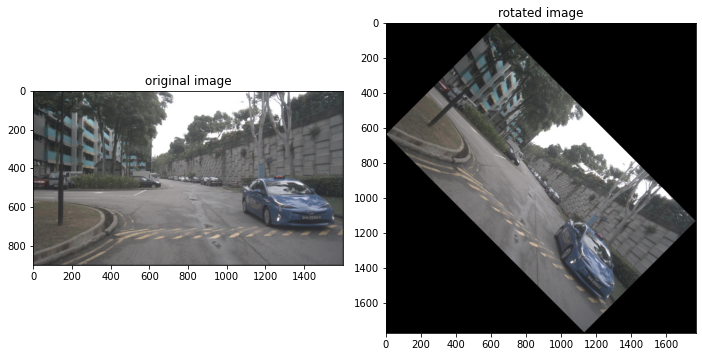

In [344]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(image)
axes[0].set_title('original image')

# Display the second image
axes[1].imshow(pil_img)
axes[1].set_title('rotated image')

# # Remove the axis labels
# for ax in axes:
#     ax.axis('off')

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.show()

# Horizontal Skew


In [345]:
new_height  = image.shape[0]
new_width  = round(abs(image.shape[1])+abs(image.shape[0]/tan))+1
print(new_height,new_width)
print(image.shape)

900 2501
(900, 1600, 3)


In [346]:
# define another image variable of dimensions of new_height and new _column filled with zeros
output = np.zeros((new_height,new_width,image.shape[2]))
output.shape

(900, 2501, 3)

In [347]:
print(output.shape)
for i in range(height):
    for j in range(width):
        
        new_x = round(j + (i/tan))
        new_y = i
#         print("pre y {} new y {} pre x {} new x {}".format(i,new_y,j, new_x))
        
        output[new_y,new_x,:]=image[i,j,:]    #writing the pixels to the new destination in the output image
            
        

(900, 2501, 3)


In [348]:
pil_img=Image.fromarray((output).astype(np.uint8))                       # converting array to image
pil_img.save("skewed_image.png") 

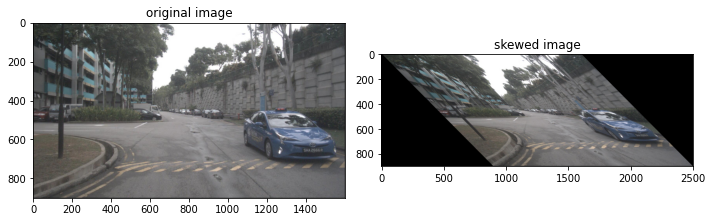

In [349]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image
axes[0].imshow(image)
axes[0].set_title('original image')

# Display the second image
axes[1].imshow(pil_img)
axes[1].set_title('skewed image')

# # Remove the axis labels
# for ax in axes:
#     ax.axis('off')

# Adjust the layout
plt.tight_layout()

# Show the figure
plt.show()